# Rainfall Weather Forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

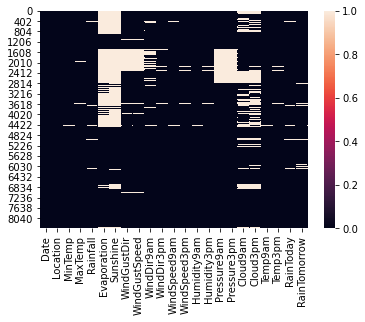

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [12]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date).dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date).dt.month

#Extracting Year from Date_of_journey column
df['Year']= pd.to_datetime(df.Date).dt.year

In [13]:
df.drop(columns=['Date'],axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [14]:
#filling the Missing value with mean for continous data and with mode for catagorical data
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [15]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [16]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


# checking the categorical and numeric data

In [17]:
#checking categorical columns
categorical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical.append(i)
print(categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# checking for numerical columns
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical.append(i)
print(numerical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


# Data Visualization

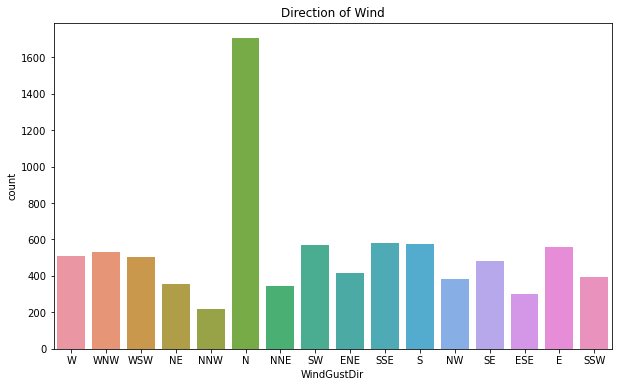

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df["WindGustDir"])
plt.title("Direction of Wind")
plt.show()

According to the data, we can see that the wind gust was strongest in the north direction, followed by the SW, SSE, S,E, W, WNW.

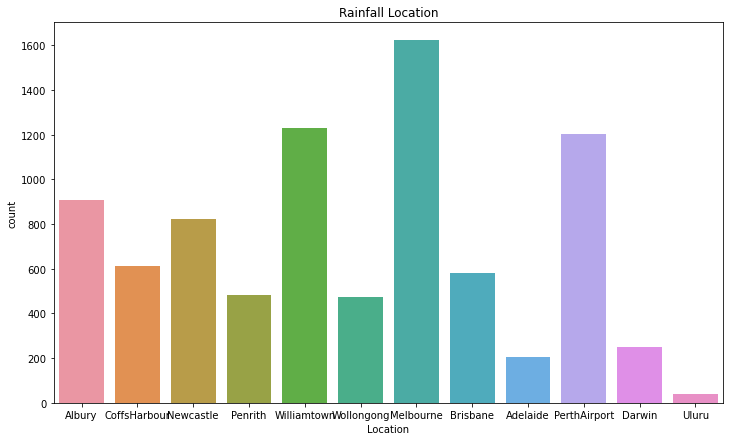

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(df["Location"])
plt.title("Rainfall Location")
plt.show()

According to this data, the highest rainfall is in Melbourne and the lowest is in Uluru.

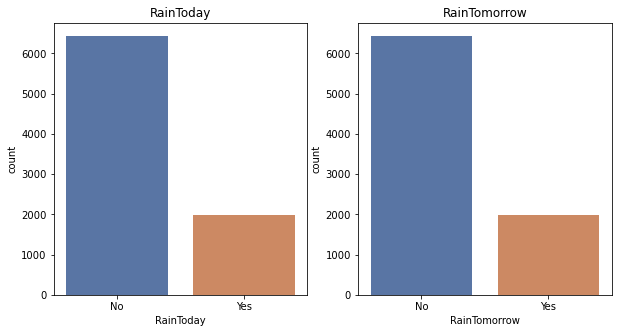

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='deep')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'],palette='deep')
plt.show()

There's hardly any difference in the rainfall today and tomorrow

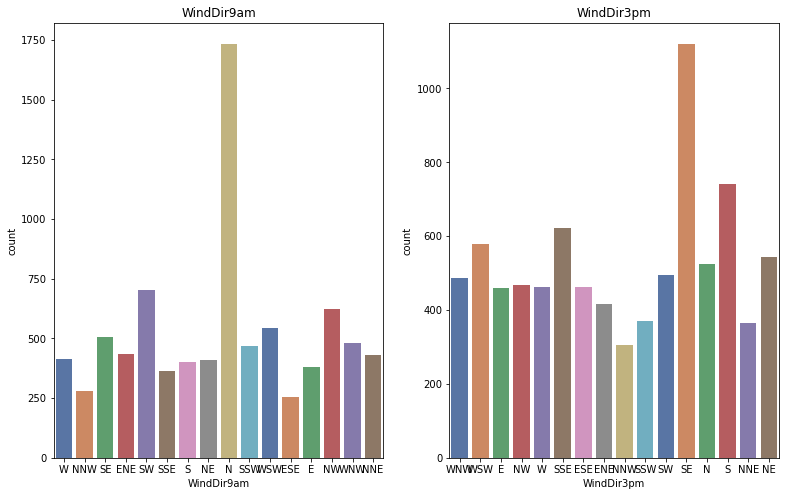

In [22]:
plt.figure(figsize=(13,8))
plt.subplot(1, 2, 1)
plt.title('WindDir9am')
sns.countplot(df['WindDir9am'],palette='deep')
plt.subplot(1,2,2)
plt.title('WindDir3pm')
sns.countplot(df['WindDir3pm'],palette='deep')
plt.show()

from the above graph, we can see that the wing direction was towards the N at 9am and in the SE at 3pm

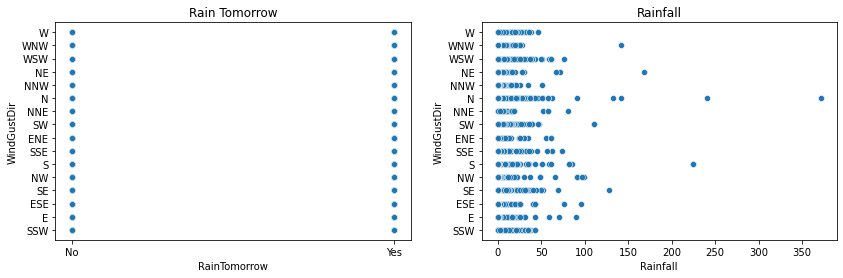

In [23]:
#checking the correlation between  WindGustDir and both target variables
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title('Rain Tomorrow')
sns.scatterplot(data=df, x='RainTomorrow',y='WindGustDir')
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(data=df, x='Rainfall',y='WindGustDir')
plt.show()

We can see that there is no linear relation of WindGustDir with both the target variables

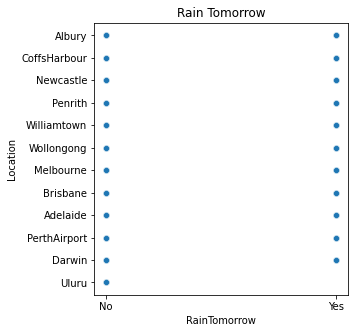

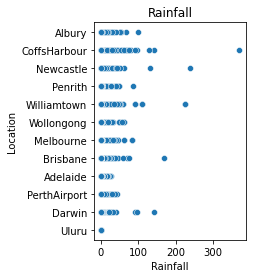

In [24]:
#checking the correlation between location and both target variables
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Rain Tomorrow')
sns.scatterplot(data=df, x='RainTomorrow',y='Location')
plt.show()
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(data=df, x='Rainfall',y='Location')
plt.show()

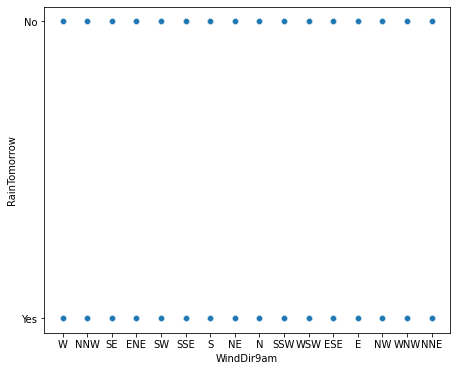

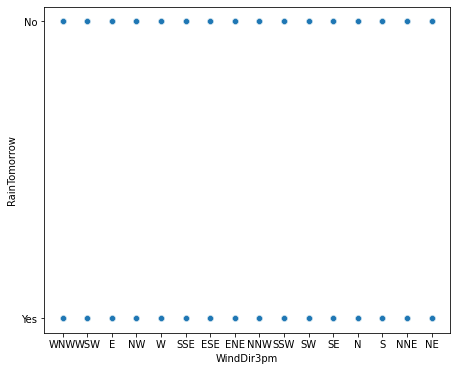

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='WindDir9am',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',data=df)
plt.show()

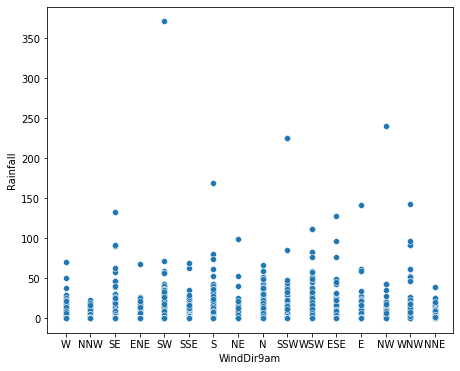

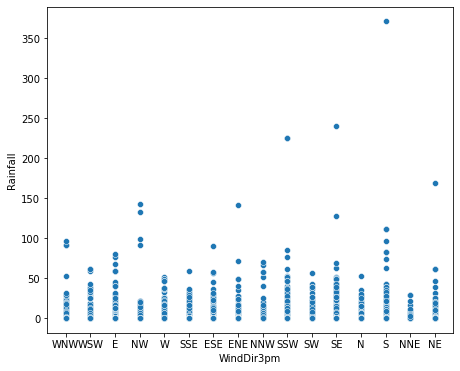

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='WindDir9am',y='Rainfall',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='WindDir3pm',y='Rainfall',data=df)
plt.show()

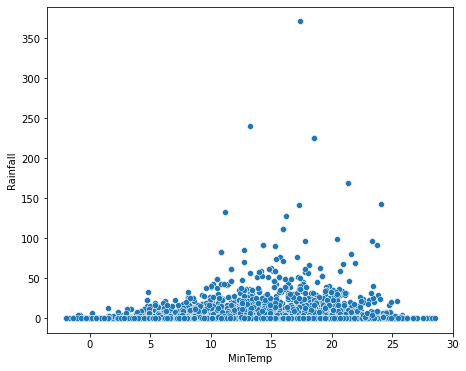

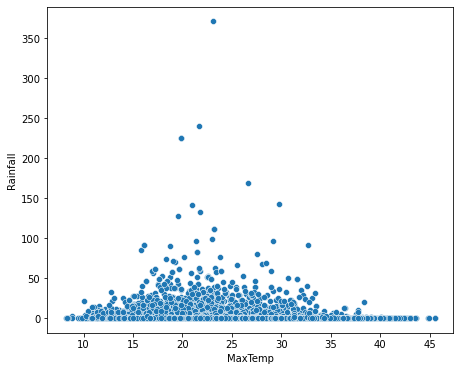

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='MinTemp',y='Rainfall',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='MaxTemp',y='Rainfall',data=df)
plt.show()

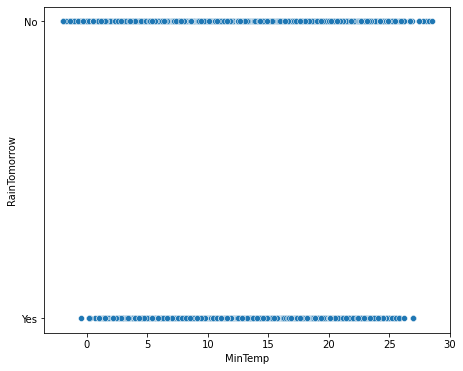

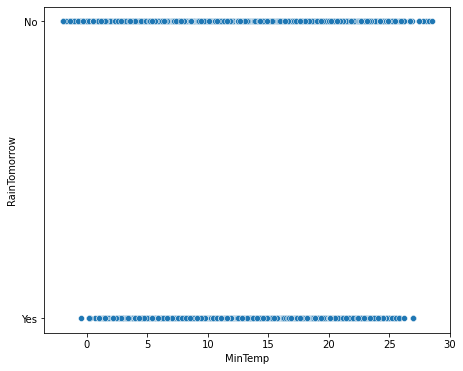

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='MinTemp',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='MinTemp',y='RainTomorrow',data=df)
plt.show()

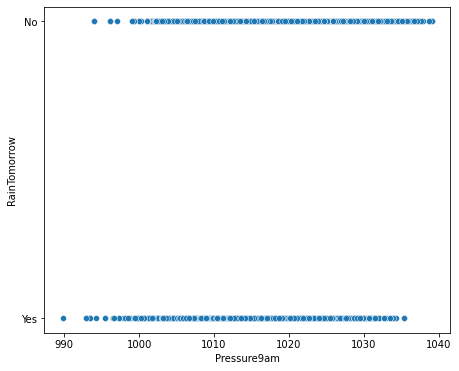

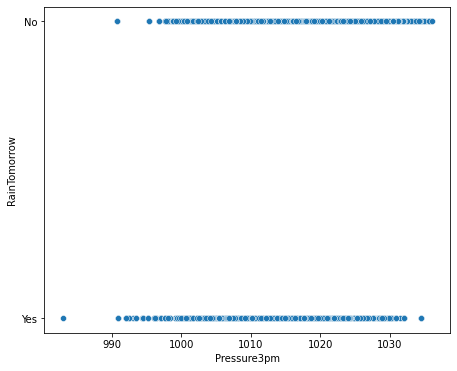

In [29]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Pressure9am',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Pressure3pm',y='RainTomorrow',data=df)
plt.show()

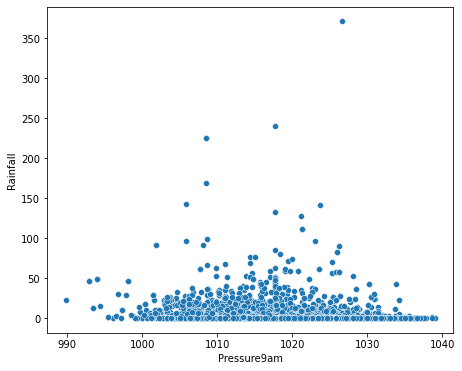

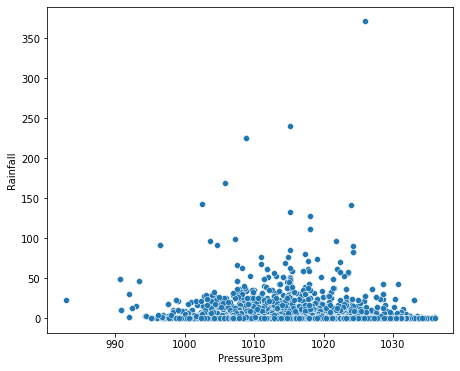

In [30]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Pressure9am',y='Rainfall',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Pressure3pm',y='Rainfall',data=df)
plt.show()

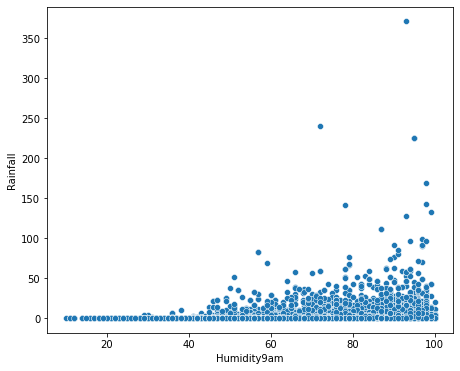

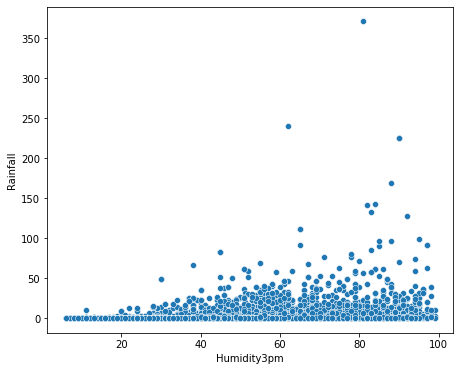

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Humidity9am',y='Rainfall',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Humidity3pm',y='Rainfall',data=df)
plt.show()

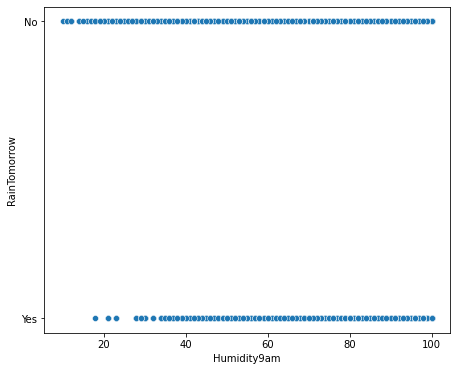

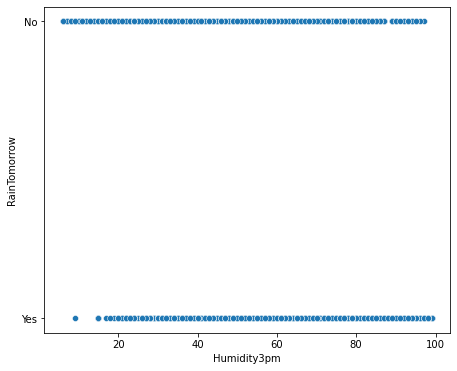

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Humidity9am',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Humidity3pm',y='RainTomorrow',data=df)
plt.show()

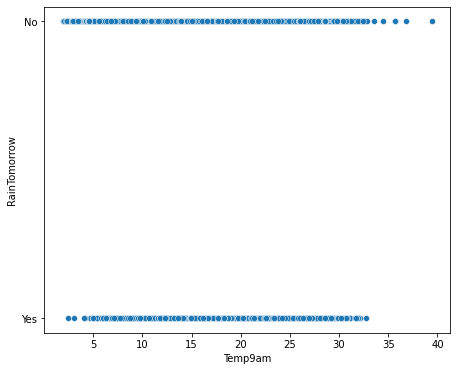

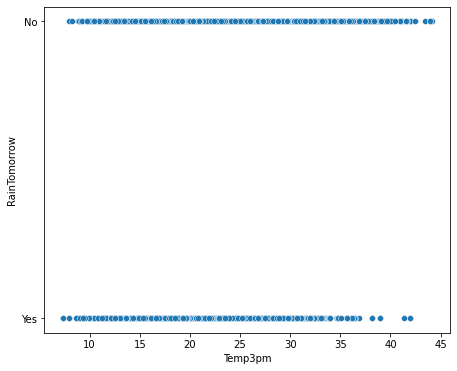

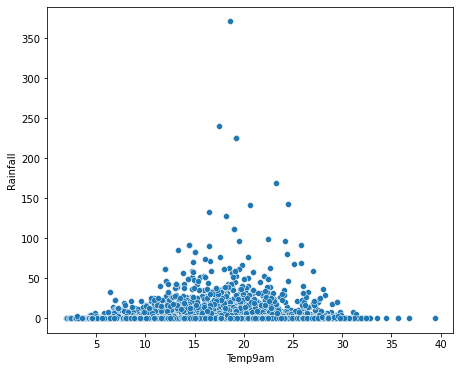

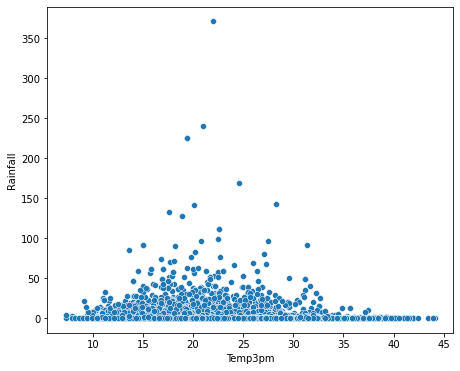

In [33]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Temp9am',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Temp3pm',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Temp9am',y='Rainfall',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Temp3pm',y='Rainfall',data=df)
plt.show()

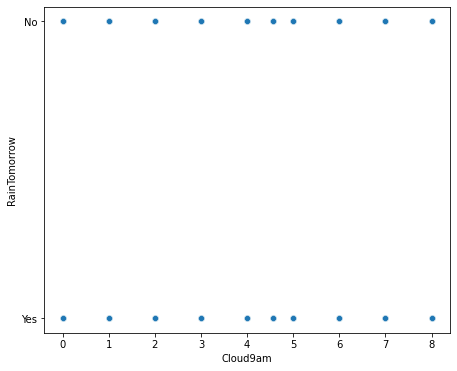

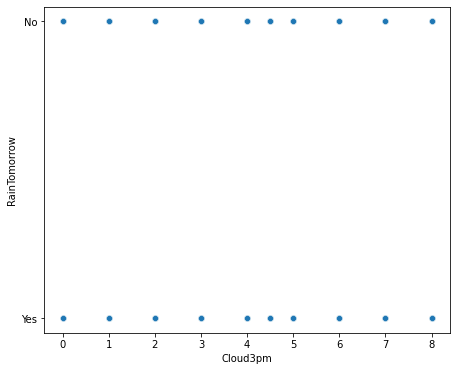

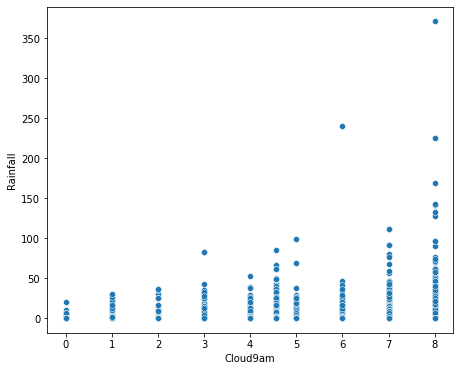

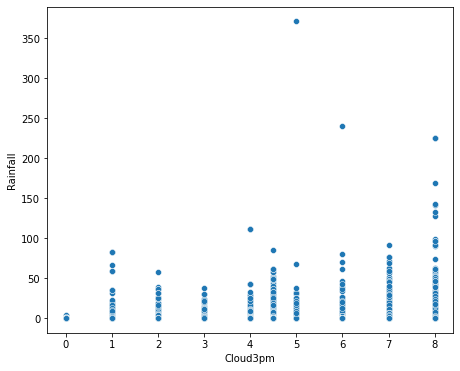

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Cloud9am',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Cloud3pm',y='RainTomorrow',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Cloud9am',y='Rainfall',data=df)
plt.show()
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.scatterplot(x='Cloud3pm',y='Rainfall',data=df)
plt.show()

MinTemp             AxesSubplot(0.125,0.657941;0.0824468x0.222059)
MaxTemp          AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Rainfall         AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
Evaporation      AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Sunshine         AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
WindGustSpeed    AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
WindSpeed9am     AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
WindSpeed3pm     AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
Humidity9am         AxesSubplot(0.125,0.391471;0.0824468x0.222059)
Humidity3pm      AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
Pressure9am      AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
Pressure3pm      AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
Cloud9am         AxesSubplot(0.520745,0.391471;0.0824468x0.222059)
Cloud3pm         AxesSubplot(0.619681,0.391471;0.0824468x0.222059)
Temp9am          AxesSubplot(0.718617,0.391471;0.0824468x0.222

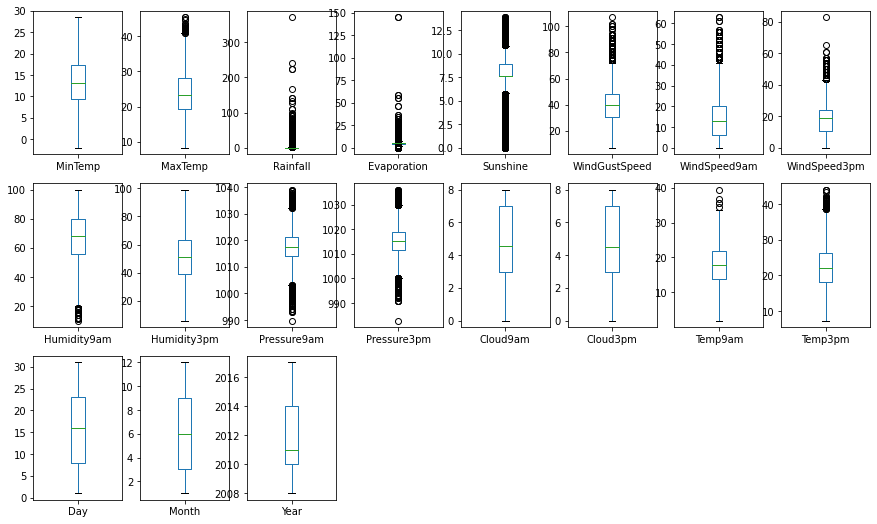

In [35]:
df.plot(kind='box', subplots=True, layout=(3,8), figsize=(15,9))

# Removing outliers

In [36]:
from scipy.stats import zscore
df1= df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(df1))
z

array([[1.57008852e-01, 2.06020811e-01, 2.30589346e-16, ...,
        1.30866453e+00, 1.53712470e-01, 1.08138052e-01],
       [2.02812062e-01, 2.64164519e-01, 2.30589346e-16, ...,
        1.19607152e+00, 1.00217155e-01, 3.12348332e-01],
       [3.00945038e-01, 2.64164519e-01, 2.30589346e-16, ...,
        1.05130907e+00, 5.77390162e-01, 1.27334323e-01],
       ...,
       [4.97210991e-01, 2.64164519e-01, 2.30589346e-16, ...,
        2.51552929e-01, 9.38310416e-01, 6.15098528e-01],
       [5.13566487e-01, 2.64164519e-01, 2.30589346e-16, ...,
        2.03298781e-01, 4.74684357e-01, 5.98279073e-01],
       [2.90531973e-15, 2.64164519e-01, 2.30589346e-16, ...,
        4.28484806e-01, 4.92516128e-01, 2.59513150e-01]])

In [37]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

In [38]:
df_new= df[(z<3).all(axis=1)]
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [39]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.519090
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

# Removing skewness with square root transformation

In [40]:
df_new["Sunshine"] = np.sqrt(df_new["Sunshine"])
df_new["Rainfall"] = np.sqrt(df_new["Rainfall"])
df_new["Evaporation"] = np.sqrt(df_new["Evaporation"])
df_new["WindSpeed9am"] = np.sqrt(df_new["WindSpeed9am"])
df_new["WindGustSpeed"] = np.sqrt(df_new["WindGustSpeed"])

In [41]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         2.020921
Evaporation     -0.410953
Sunshine        -2.045075
WindGustSpeed   -0.000619
WindSpeed9am    -0.517704
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[categorical]= df_new[categorical].apply(le.fit_transform)
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.774597,2.321507,2.762645,13,6.633250,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,2.321507,2.762645,14,6.633250,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,2.321507,2.762645,15,6.782330,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,2.321507,2.762645,4,4.898979,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.000000,2.321507,2.762645,13,6.403124,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,2.321507,2.762645,0,5.567764,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,2.321507,2.762645,6,4.690416,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,2.321507,2.762645,3,6.082763,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,2.321507,2.762645,9,5.291503,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [43]:
df_new.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.014833,0.128261,0.062924,-0.037707,0.256692,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.082149,0.366061,0.024841,-0.154935,0.248401,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.202659,0.468235,0.341250,-0.237955,0.151011,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.014833,0.082149,-0.202659,1.000000,-0.148135,-0.202204,0.113167,0.087071,0.147658,0.102485,...,-0.035351,0.276565,0.239676,-0.074098,-0.212059,0.870888,0.314361,-0.016768,-0.006506,0.005628
Evaporation,0.128261,0.366061,0.468235,-0.148135,1.000000,0.355334,-0.119515,0.173974,-0.104359,-0.039052,...,-0.275208,-0.108208,-0.142809,0.435477,0.455210,-0.168056,-0.089387,0.010554,-0.051104,0.141194
Sunshine,0.062924,0.024841,0.341250,-0.202204,0.355334,1.000000,-0.083396,0.004580,-0.061466,-0.055252,...,-0.044937,-0.469535,-0.489440,0.207353,0.357216,-0.200866,-0.304183,0.001049,-0.000586,0.096849
WindGustDir,-0.037707,-0.154935,-0.237955,0.113167,-0.119515,-0.083396,1.000000,0.001046,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.256692,0.248401,0.151011,0.087071,0.173974,0.004580,0.001046,1.000000,-0.065464,0.082822,...,-0.331602,0.007720,0.059276,0.219194,0.116574,0.076282,0.172689,-0.005562,0.047462,-0.024826
WindDir9am,-0.041030,-0.045231,-0.217160,0.147658,-0.104359,-0.061466,0.405681,-0.065464,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.102485,-0.039052,-0.055252,0.507292,0.082822,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


<AxesSubplot:>

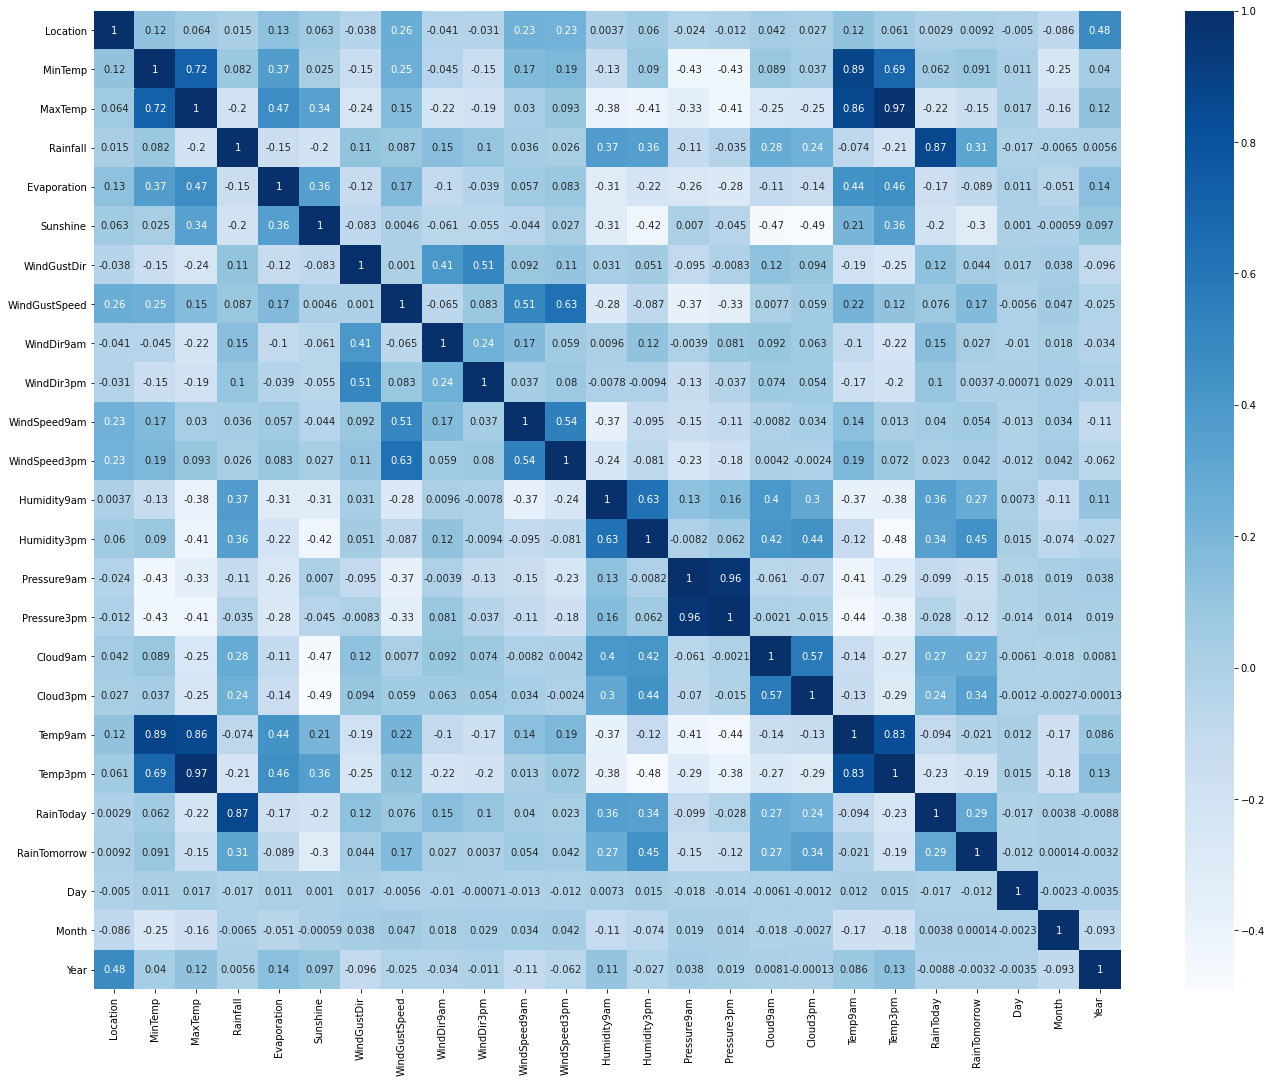

In [44]:
plt.figure(figsize=(23,18))    
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')

# Rain tomorrow prediction:

In [45]:
x = df_new.drop("RainTomorrow", axis=1)
y = df_new["RainTomorrow"]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.102712,0.22369,0.113572,1.229267,0.433949,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.544512,0.22369,0.113572,1.441960,0.433949,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.544512,0.22369,0.113572,1.654654,0.579274,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.544512,0.22369,0.113572,-0.684977,-1.256637,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.291050,0.22369,0.113572,1.229267,0.209620,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.544512,0.22369,0.113572,-1.535751,-0.604698,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.544512,0.22369,0.113572,-0.259589,-1.459948,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.544512,0.22369,0.113572,-0.897670,-0.102672,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.544512,0.22369,0.113572,0.378492,-0.874001,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


# VIF Factor

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.590385,Location
1,8.805347,MinTemp
2,26.402915,MaxTemp
3,4.314831,Rainfall
4,1.523513,Evaporation
5,1.720759,Sunshine
6,1.618888,WindGustDir
7,2.239267,WindGustSpeed
8,1.381436,WindDir9am
9,1.490082,WindDir3pm


In [48]:
x.drop("Pressure9am",axis=1,inplace=True)

In [49]:
x.drop("Temp3pm",axis=1,inplace=True)

In [50]:
x.drop("Temp9am",axis=1,inplace=True)

In [51]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.587075,Location
1,4.525272,MinTemp
2,5.409934,MaxTemp
3,4.297373,Rainfall
4,1.502805,Evaporation
5,1.714013,Sunshine
6,1.599125,WindGustDir
7,2.164996,WindGustSpeed
8,1.357912,WindDir9am
9,1.421046,WindDir3pm


In [52]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

Here, there's a huge difference in both the class, we will use to SMOTE to make both the classes even

In [53]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x,y= smote.fit_resample(x,y)

In [54]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [56]:
max_accuracy=0
max_random_state=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>max_accuracy:
        max_accuracy=acc
        max_random_state =i
print("Best accuracy is ",max_accuracy," on Random_state ",max_random_state)

Best accuracy is  0.7877804812111382  on Random_state  71


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=109)

# Logistic Regression

In [58]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7696674776966748
[[993 265]
 [303 905]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1258
           1       0.77      0.75      0.76      1208

    accuracy                           0.77      2466
   macro avg       0.77      0.77      0.77      2466
weighted avg       0.77      0.77      0.77      2466



# Support Vector Classifier

In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8686131386861314
[[1068  190]
 [ 134 1074]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1258
           1       0.85      0.89      0.87      1208

    accuracy                           0.87      2466
   macro avg       0.87      0.87      0.87      2466
weighted avg       0.87      0.87      0.87      2466



# KNeighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc= knc.predict(x_test)
print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test, predknc))

0.8698296836982968
[[ 966  292]
 [  29 1179]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1258
           1       0.80      0.98      0.88      1208

    accuracy                           0.87      2466
   macro avg       0.89      0.87      0.87      2466
weighted avg       0.89      0.87      0.87      2466



# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.935117599351176
[[1164   94]
 [  66 1142]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1258
           1       0.92      0.95      0.93      1208

    accuracy                           0.94      2466
   macro avg       0.94      0.94      0.94      2466
weighted avg       0.94      0.94      0.94      2466



# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.8872668288726683
[[1099  159]
 [ 119 1089]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1258
           1       0.87      0.90      0.89      1208

    accuracy                           0.89      2466
   macro avg       0.89      0.89      0.89      2466
weighted avg       0.89      0.89      0.89      2466



# Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc= gbc.predict(x_test)
print(accuracy_score(y_test, predgbc))
print(confusion_matrix(y_test, predgbc))
print(classification_report(y_test, predgbc))

0.8629359286293593
[[1076  182]
 [ 156 1052]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1258
           1       0.85      0.87      0.86      1208

    accuracy                           0.86      2466
   macro avg       0.86      0.86      0.86      2466
weighted avg       0.86      0.86      0.86      2466



# Cross Validation Score

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rfc,x,y,cv=5).mean())

# cv score for SVC
print('Support Vector Classifier:',cross_val_score(svc,x,y,cv=5).mean())

#cv score for Kkneighbors Classifier
print('Kneighbors Classifier:',cross_val_score(knc,x,y,cv=5).mean())

#cv score for Decision Tree Classifier
print('Decision Tree Classifier:',cross_val_score(dtc,x,y,cv=5).mean())

#cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).mean())

Logistic Regression: 0.7104622871046228
Random Forest Classifier: 0.7928629359286294
Support Vector Classifier: 0.7347120843471208
Kneighbors Classifier: 0.7274128142741281
Decision Tree Classifier: 0.7302514193025141
Gradient Boosting Classifier: 0.6888077858880779


As Random Forest Classifier has the best accuracy score after cross validation, we will continue with it 

# Hyper Parameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [68]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.8548256285482563

# AUC ROC Curve

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [70]:
y=rfc.predict_proba(x_test)[:,1]
y

array([0.11, 0.19, 0.07, ..., 0.01, 0.02, 0.99])

In [71]:
fpr,tpr,thresholds=roc_curve(y_test,y)

In [72]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.94912560e-04, 7.94912560e-04, 7.94912560e-04, 7.94912560e-04,
       1.58982512e-03, 1.58982512e-03, 1.58982512e-03, 1.58982512e-03,
       1.58982512e-03, 2.38473768e-03, 2.38473768e-03, 2.38473768e-03,
       2.38473768e-03, 3.17965024e-03, 3.97456280e-03, 3.97456280e-03,
       6.35930048e-03, 7.15421304e-03, 1.03338633e-02, 1.27186010e-02,
       1.43084261e-02, 1.43084261e-02, 1.58982512e-02, 1.66931638e-02,
       1.98728140e-02, 2.14626391e-02, 2.30524642e-02, 2.46422893e-02,
       2.54372019e-02, 2.62321145e-02, 2.94117647e-02, 3.02066773e-02,
       3.25914149e-02, 3.57710652e-02, 4.37201908e-02, 4.53100159e-02,
       4.53100159e-02, 4.68998410e-02, 4.92845787e-02, 5.08744038e-02,
       5.40540541e-02, 5.48489666e-02, 5.96184420e-02, 6.91573927e-02,
       7.07472178e-02, 7.47217806e-02, 7.63116057e-02, 7.79014308e-02,
       8.50556439e-02, 8.98251192e-02, 9.53895072e-02, 9.93640700e-02,
      

In [73]:
tpr

array([0.        , 0.06539735, 0.13162252, 0.18791391, 0.24834437,
       0.30049669, 0.34188742, 0.38410596, 0.42880795, 0.46109272,
       0.50331126, 0.53062914, 0.56374172, 0.5852649 , 0.62996689,
       0.65149007, 0.67466887, 0.69370861, 0.70612583, 0.72268212,
       0.73427152, 0.75      , 0.76324503, 0.77317881, 0.78228477,
       0.79387417, 0.8013245 , 0.80960265, 0.82036424, 0.8294702 ,
       0.83609272, 0.8468543 , 0.85264901, 0.86672185, 0.87831126,
       0.8865894 , 0.89155629, 0.89817881, 0.90397351, 0.90728477,
       0.91142384, 0.91556291, 0.9205298 , 0.9263245 , 0.92715232,
       0.93211921, 0.93708609, 0.94039735, 0.94288079, 0.94536424,
       0.95198675, 0.95529801, 0.95695364, 0.96109272, 0.96688742,
       0.96937086, 0.97019868, 0.9718543 , 0.97268212, 0.97433775,
       0.97682119, 0.97930464, 0.97930464, 0.97930464, 0.98344371,
       0.98509934, 0.9884106 , 0.9884106 , 0.9884106 , 0.9884106 ,
       0.98923841, 0.99006623, 0.99089404, 0.99172185, 0.99172

In [74]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01, 0.  ])

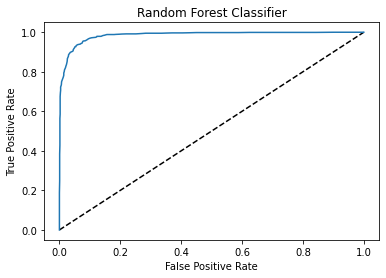

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [76]:
score= roc_auc_score(y_test, rfc.predict(x_test))
print(score)

0.9353212289032312


# Saving the Model

In [77]:
import pickle
filename='Rainfall Weather Forecasting.pkl'
pickle.dump(rfc,open(filename,"wb"))

In [78]:
model=pickle.load(open('Rainfall Weather Forecasting.pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

0.935117599351176


In [79]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465
Predicted,0,0,0,0,0,1,0,1,1,1,...,0,0,0,1,1,1,1,0,0,1
Original,0,0,0,0,0,1,0,1,1,1,...,0,0,0,1,1,1,1,0,0,1


# Prediction for rainfall

In [80]:
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.774597,2.321507,2.762645,13,6.633250,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,2.321507,2.762645,14,6.633250,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,2.321507,2.762645,15,6.782330,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,2.321507,2.762645,4,4.898979,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.000000,2.321507,2.762645,13,6.403124,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [81]:
x = df_new.drop("Rainfall", axis=1)
y = df_new["Rainfall"]

In [82]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.22369,0.113572,1.229267,0.433949,1.250245,1.400214,0.761025,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.22369,0.113572,1.441960,0.433949,-0.277857,1.626597,-0.859716,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.22369,0.113572,1.654654,0.579274,1.250245,1.626597,0.686787,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.22369,0.113572,-0.684977,-1.256637,0.377044,-1.769138,0.003468,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.22369,0.113572,1.229267,0.209620,-1.369358,-0.184462,-0.436359,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.22369,0.113572,-1.535751,-0.604698,0.377044,-1.542755,0.192889,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.22369,0.113572,-0.259589,-1.459948,0.377044,-1.089991,0.192889,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.22369,0.113572,-0.897670,-0.102672,0.377044,1.400214,-0.204113,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.22369,0.113572,0.378492,-0.874001,0.595344,-1.089991,0.192889,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# VIF

In [83]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.600885,Location
1,8.819113,MinTemp
2,26.390425,MaxTemp
3,1.523691,Evaporation
4,1.735759,Sunshine
5,1.621211,WindGustDir
6,2.308261,WindGustSpeed
7,1.380442,WindDir9am
8,1.491289,WindDir3pm
9,1.932229,WindSpeed9am


In [84]:
x.drop("MaxTemp",axis=1,inplace=True)

In [85]:
x.drop("Pressure9am",axis=1,inplace=True)

In [86]:
x.drop("Temp9am",axis=1,inplace=True)

In [87]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.597917,Location
1,4.953599,MinTemp
2,1.500572,Evaporation
3,1.720370,Sunshine
4,1.603548,WindGustDir
5,2.252510,WindGustSpeed
6,1.357336,WindDir9am
7,1.427486,WindDir3pm
8,1.906793,WindSpeed9am
9,1.943698,WindSpeed3pm


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [93]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.851447513475305  on Random_state  195


In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=195)

# Random Forest Regressor

In [97]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test, predrf))
print('Mean Squared Error:',mean_squared_error(y_test, predrf))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, predrf)))

R2_Score: 0.8700315096968866
Mean absolute error: 0.22590419564754846
Mean Squared Error: 0.1754546646930769
Root Mean Square Error: 0.41887308900558046


# Gradient Boosting Regressor

In [106]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print('R2_Score:',r2_score(y_test,predgbr))
print('Mean absolute error:',mean_absolute_error(y_test, predgbr))
print('Mean Squared Error:',mean_squared_error(y_test, predgbr))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, predgbr)))

R2_Score: 0.8155063433500811
Mean absolute error: 0.28271985943289296
Mean Squared Error: 0.24906246575625374
Root Mean Square Error: 0.4990615851337926


# Extra Trees Regressor

In [101]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predetr=etr.predict(x_test)
print('R2_Score:',r2_score(y_test,predetr))
print('Mean absolute error:',mean_absolute_error(y_test, predetr))
print('Mean Squared Error:',mean_squared_error(y_test, predetr))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, predetr)))

R2_Score: 0.8735641955253264
Mean absolute error: 0.19194749921737395
Mean Squared Error: 0.1706856148560794
Root Mean Square Error: 0.41314115609084434


# Decision Tree Regressor

In [104]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=etr.predict(x_test)
print('R2_Score:',r2_score(y_test,preddtr))
print('Mean absolute error:',mean_absolute_error(y_test, preddtr))
print('Mean Squared Error:',mean_squared_error(y_test, preddtr))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test, preddtr)))

R2_Score: 0.8735641955253264
Mean absolute error: 0.19194749921737395
Mean Squared Error: 0.1706856148560794
Root Mean Square Error: 0.41314115609084434


# Cross Validation Score

In [110]:
# cv score for Random Forest Regressor
print('Random Forest Regressor:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for SVC
print('Extra Trees Regressor:',cross_val_score(etr,x,y,cv=5).mean())

#cv score for Decision Tree Classifier
print('Decision Tree Regressor:',cross_val_score(dtr,x,y,cv=5).mean())

#cv score for Gradient Boosting Classifier
print('Gradient Boosting Regressor:',cross_val_score(gbr,x,y,cv=5).mean())

Random Forest Regressor: 0.8063991600240767
Extra Trees Regressor: 0.8188558820449167
Decision Tree Regressor: 0.6469059582358097
Gradient Boosting Regressor: 0.7774006002547049


After cross validation, Extra Trees Regressor gives the best accuracy score

# Hyper Parameter Tuning

In [111]:
#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [114]:
Rainfall = ExtraTreesRegressor(criterion='mse', max_depth=8, n_estimators=100)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:',mean_squared_error(y_test, pred))

R2_Score: 82.62335738760362
RMSE value: 0.4843355607639182
MAE: 0.27419220311141673
MSE: 0.23458093542049913


# Saving the model in pickle format

In [116]:
import pickle
filename='Rainfall Weather Forecasting.pkl'
pickle.dump(etr,open(filename,"wb"))

# Conclusion

In [117]:
model=pickle.load(open('Rainfall Weather Forecasting.pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

0.8735641955253264


In [118]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
Predicted,0.063187,0.0,2.050693,0.071848,0.0,0.211104,2.607681,0.774597,3.960015,0.186946,...,0.073407,0.148535,0.138633,0.032182,0.027487,0.305527,0.016325,2.552511,0.008944,2.097618
Original,0.063187,0.0,2.050693,0.071848,0.0,0.211104,2.607681,0.774597,3.960015,0.186946,...,0.073407,0.148535,0.138633,0.032182,0.027487,0.305527,0.016325,2.552511,0.008944,2.097618
